# SQL Project Report

## Introduction
In this project, we created and managed a database named `StudentCourseManagement`. We performed various SQL operations such as creating tables, inserting data, and executing different types of queries.

## Database Schema

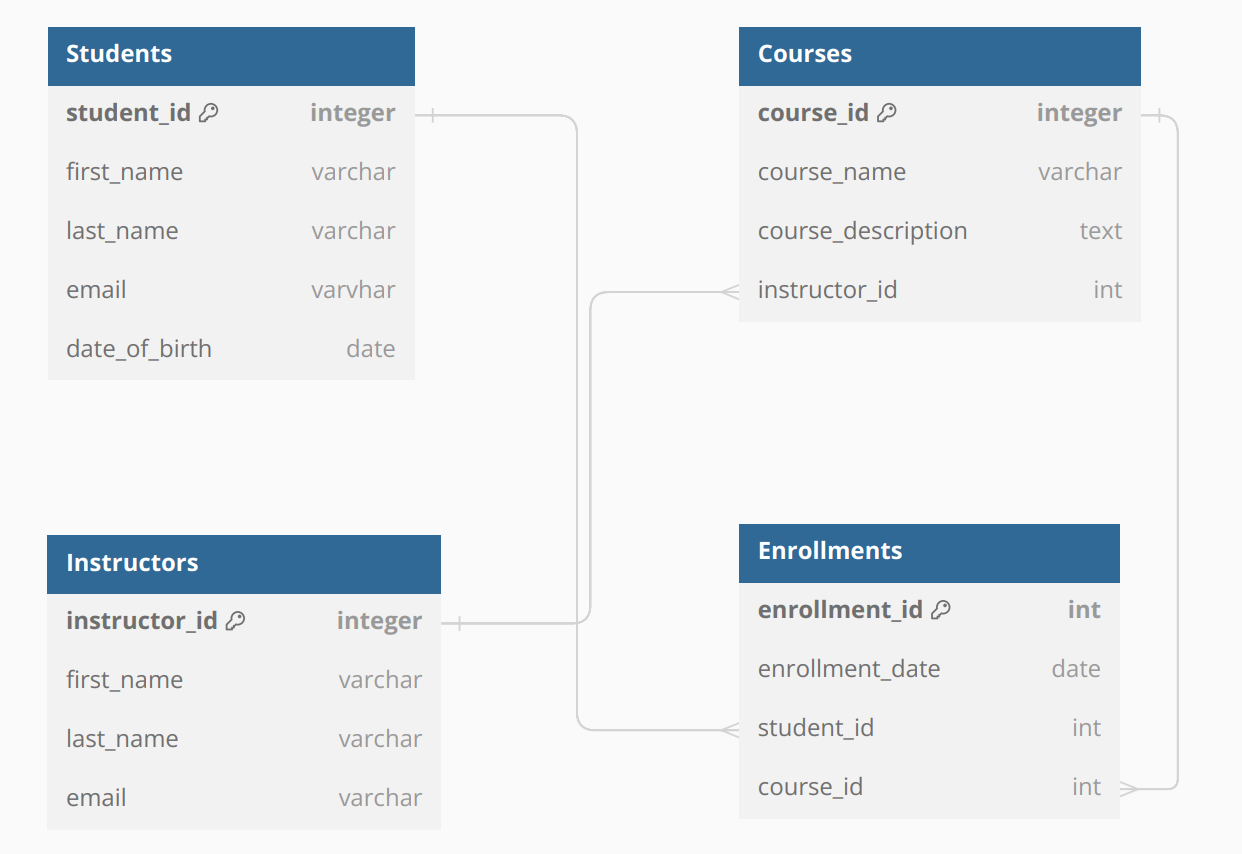

In [262]:
from IPython.display import Image 
Image(filename='D:\Data Engineering\StudentCourseManagement.png')

## Connecting Jupyter to SQL Server

We used `pyodbc` to connect Jupyter Notebook to the SQL Server and run queries directl.


In [263]:
!pip install pyodbc 

In [321]:
import pyodbc
import pandas as pd

conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=DESKTOP-STO9O38\\SQLEXPRESS;'
    'DATABASE=master;'
    'Trusted_Connection=yes;'
)

# Create a cursor object
cursor = conn.cursor()

if conn:
    print("yes")

yes


##### Explanation: 
This code snippet shows how to connect to the SQL Server

In [322]:
# Function to execute query and return DataFrame
def execute_query(query):
    return pd.read_sql(query, conn)

## 1. Database Setup
First, we created the `StudentCourseManagement` database.


```sql
-- Create Database
CREATE DATABASE StudentCourseManagement;
USE StudentCourseManageent;


In [323]:
create_db_query = "CREATE DATABASE STUDENTCOURSEMANAGEMENT;"

# Execute the query
cursor.execute(create_db_query)
conn.commit()

print("Database 'STUDENTCOURSEMANAGEMENT' Created Succefully.")

Database 'STUDENTCOURSEMANAGEMENT' Created Succefully.


In [324]:
# Reconnect to the newly created database
conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=DESKTOP-STO9O38\\SQLEXPRESS;'
    'DATABASE=STUDENTCOURSEMANAGEMENT;'
    'Trusted_Connection=yes;'
)
cursor = conn.cursor()

In [325]:
use_database = "USE STUDENTCOURSEMANAGEMENT;"

cursor.execute(use_database)
conn.commit()

print("Database Selected Succefully.")

Database Selected Succefully.


##### Explanation:
The above code creates a new database named **StudentCourseManagement** and connect it with sql server for use.

## 2. Table Creation
Next, we created the necessary tables: Students, Courses, Instructors, and Enrollments.

```sql
--Create Students table
CREATE TABLE Students
(
student_id INT IDENTITY(1, 1),
first_name VARCHAR(15),
last_name VARCHAR(15),
email VARCHAR(50),
date_of_birth DATE,
CONSTRAINT students_pk PRIMARY KEY (student_id)
);

--Create Courses table
CREATE TABLE Courses(
     course_id INT IDENTITY(1, 1),
     course_name VARCHAR(15),
     course_description TEXT,
	 CONSTRAINT courses_pk PRIMARY KEY (course_id)
	 );

--Create Instructors table
CREATE TABLE Instructors(
     instructor_id INT IDENTITY(1, 1),
     first_name VARCHAR(15),
     last_name VARCHAR(15),
     email VARCHAR(30),
	 CONSTRAINT instructor_pk PRIMARY KEY (instructor_id)
	 );

--Create Enrollments table
CREATE TABLE Enrollments(
     enrollment_id INT IDENTITY(1, 1),
     enrollment_date DATE,
	 student_id INT,
	 course_id INT,
	 CONSTRAINT studnts_fk FOREIGN KEY (student_id)
	 REFERENCES Students (student_id),
	 CONSTRAINT courses_fk FOREIGN KEY (course_id)
	 REFERENCES Courses (course_id)
	 );

In [326]:
# Create Students table
students_table = """
CREATE TABLE Students
(
student_id INT IDENTITY(1, 1),
first_name VARCHAR(15),
last_name VARCHAR(15),
email VARCHAR(50),
date_of_birth DATE,
CONSTRAINT students_pk PRIMARY KEY (student_id)
);
"""

# Execute the query
cursor.execute(students_table)
conn.commit()

print("Students Table Created Succefully.")

Students Table Created Succefully.


In [327]:
# Create Instructors table
instructors_table = """
CREATE TABLE Instructors(
     instructor_id INT IDENTITY(1, 1),
     first_name VARCHAR(15),
     last_name VARCHAR(15),
     email VARCHAR(30),
	 CONSTRAINT instructor_pk PRIMARY KEY (instructor_id)
	 );
"""

# Execute the query
cursor.execute(instructors_table)
conn.commit()

print("Instructors Table Created Succefully.")

Instructors Table Created Succefully.


In [328]:
# Create Courses table
courses_table = """
CREATE TABLE Courses(
     course_id INT IDENTITY(1, 1),
     course_name VARCHAR(30),
     course_description TEXT,
     instructor_id INT,
	 CONSTRAINT courses_pk PRIMARY KEY (course_id),
     CONSTRAINT instructors_fk FOREIGN KEY (instructor_id)
	 REFERENCES Instructors (instructor_id),
	 );
"""

# Execute the query
cursor.execute(courses_table)
conn.commit()

print("Courses Table Created Succefully.")

Courses Table Created Succefully.


In [329]:
# Create Enrollments table
enrollments_table = """
CREATE TABLE Enrollments(
     enrollment_id INT IDENTITY(1, 1),
     enrollment_date DATE,
	 student_id INT,
	 course_id INT,
	 CONSTRAINT studnts_fk FOREIGN KEY (student_id)
	 REFERENCES Students (student_id),
	 CONSTRAINT courses_fk FOREIGN KEY (course_id)
	 REFERENCES Courses (course_id)
	 );
"""

# Execute the query
cursor.execute(enrollments_table)
conn.commit()

print("Enrollments Table Created Succefully.")

Enrollments Table Created Succefully.


##### Explanation:
This code creates four tables: Students, Courses, Instructors, and Enrollments, with appropriate data types and constraints.

## 3. Insert Sample Data

We inserted sample data into the tables.

```sql
--Insert Sample Data into Students table 
INSERT INTO Students(first_name, last_name, email, date_of_birth)
VALUES ('Ahmed', 'Mohamed', 'ahmed.mohamed@gmail.com', '20000212'),
('Mostafa', 'Ali', 'mostafa.ali@gmail.com', '19990423'),
('Khaled', 'Mohamed', 'khaled.mohamed@gmail.com', '20010604'),
('Mona', 'Ahmed', 'monaahmed@gmail.com', '19980202'),
('Rowan', 'Osama', 'rowan.osama@gmail.com', '19990304'),
('Nada', 'Youssef', 'nada.youssef@gmail.com', '20000104'),
('Mohamed', 'Hassan', 'mohamed.hassan@gmail.com', '20000903'),
('Omar', 'Ahmed', 'omarahmed@gmail.com', '19980208'),
('Ali', 'Gaber', 'aligaber@gmail.com', '19990205'),
('Nahla', 'Ahmed', 'nahla.ahmed@gmail.com', '20000709');

--Insert Sample Data into Courses table 
INSERT INTO Courses(course_name, course_description, instructor_id)
VALUES ('Data Engineering', 'This course focuses on the design, implementation, and management of data pipelines. Topics include data ingestion, ETL (Extract, Transform, Load) processes, data storage solutions, big data technologies, and data warehousing. Students will learn to build and optimize scalable data architectures.', 1),
('Data Science', 'This course provides an in-depth understanding of data science principles and techniques. Topics include data exploration, statistical analysis, machine learning, predictive modeling, and data visualization. Students will work on real-world datasets to apply data science methods and tools.', 1),
('Machine Learning', 'This course covers the foundational concepts and techniques of machine learning. Topics include supervised and unsupervised learning, neural networks, decision trees, support vector machines, and clustering algorithms. Students will apply machine learning methods to real-world datasets.', 2),
('Artificial Intelligence', 'This course explores the principles and techniques of artificial intelligence. Topics include search algorithms, knowledge representation, machine learning, natural language processing, robotics, and ethical issues in AI. Students will implement AI algorithms and systems.', 3),
('Data Analysis', 'This course covers the fundamentals of data analysis and interpretation. Topics include data cleaning, exploratory data analysis, statistical techniques, hypothesis testing, and data visualization. Students will use tools like Python, R, and SQL to analyze and derive insights from data.', NULL),
('Cloud Computing', 'This course covers the fundamentals of cloud computing and its applications. Topics include cloud service models, virtualization, data storage, scalability, and security in the cloud. Students will gain hands-on experience with cloud platforms such as AWS, Azure, and Google Cloud.', 4);    

--Insert Sample Data into Instructors table 
INSERT INTO Instructors (first_name, last_name, email)
VALUES('Ahmed', 'Essam', 'ahmed.essam@gmail.com'),
('Ahmed', 'Azab', 'ahmed.azab@gmail.com'),
('Mohamed', 'Ali', 'mohamed.ali@gmail.com'),
('Salma', 'Mohamed', 'salma.mohamed@gmail.com');    

--Insert Sample Data into Enrollments table 
INSERT INTO Enrollments(student_id, course_id, enrollment_date)
VALUES(1, 1, '20240201'),
(2, 2, '20240203'),
(3, 1, '20240201'),
(4, 2, '20240204'),
(5, 3, '20240301'),
(6, 4, '20240201'),
(7, 1, '20240201'),
(8, 2, '20240301'),
(9, 3, '20240102'),
(1, 2, '20240203'),
(2, 1, '20240302'),
(3, 4, '20240504'),
(4, 2, '20240304'),
(5, 1, '20240304'),
(6, 1, '20240201');

In [330]:
# Insert Sample Data into Students table 
insert_students = """
INSERT INTO Students(first_name, last_name, email, date_of_birth)
VALUES ('Ahmed', 'Mohamed', 'ahmed.mohamed@gmail.com', '20000212'),
('Mostafa', 'Ali', 'mostafa.ali@gmail.com', '19990423'),
('Khaled', 'Mohamed', 'khaled.mohamed@gmail.com', '20010604'),
('Mona', 'Ahmed', 'monaahmed@gmail.com', '19980202'),
('Rowan', 'Osama', 'rowan.osama@gmail.com', '19990304'),
('Nada', 'Youssef', 'nada.youssef@gmail.com', '20000104'),
('Mohamed', 'Hassan', 'mohamed.hassan@gmail.com', '20000903'),
('Omar', 'Ahmed', 'omarahmed@gmail.com', '19980208'),
('Ali', 'Gaber', 'aligaber@gmail.com', '19990205'),
('Nahla', 'Ahmed', 'nahla.ahmed@gmail.com', '20000709')
"""

# Execute the query
cursor.execute(insert_students)
conn.commit()

print("Values Inserted Into Students Table Succefully.")

Values Inserted Into Students Table Succefully.


In [331]:
# Insert Sample Data into Instructors table 
insert_instructors = """
INSERT INTO Instructors (first_name, last_name, email)
VALUES('Ahmed', 'Essam', 'ahmed.essam@gmail.com'),
('Ahmed', 'Azab', 'ahmed.azab@gmail.com'),
('Mohamed', 'Ali', 'mohamed.ali@gmail.com'),
('Salma', 'Mohamed', 'salma.mohamed@gmail.com');
"""

# Execute the query
cursor.execute(insert_instructors)
conn.commit()

print("Values Inserted Into Instructors Table Succefully.")

Values Inserted Into Instructors Table Succefully.


In [332]:
# Insert Sample Data into Courses table
insert_courses = """
INSERT INTO Courses(course_name, course_description, instructor_id)
VALUES ('Data Engineering', 'This course focuses on the design, implementation, and management of data pipelines. Topics include data ingestion, ETL (Extract, Transform, Load) processes, data storage solutions, big data technologies, and data warehousing. Students will learn to build and optimize scalable data architectures.', 1),
('Data Science', 'This course provides an in-depth understanding of data science principles and techniques. Topics include data exploration, statistical analysis, machine learning, predictive modeling, and data visualization. Students will work on real-world datasets to apply data science methods and tools.', 1),
('Machine Learning', 'This course covers the foundational concepts and techniques of machine learning. Topics include supervised and unsupervised learning, neural networks, decision trees, support vector machines, and clustering algorithms. Students will apply machine learning methods to real-world datasets.', 2),
('Artificial Intelligence', 'This course explores the principles and techniques of artificial intelligence. Topics include search algorithms, knowledge representation, machine learning, natural language processing, robotics, and ethical issues in AI. Students will implement AI algorithms and systems.', 3),
('Data Analysis', 'This course covers the fundamentals of data analysis and interpretation. Topics include data cleaning, exploratory data analysis, statistical techniques, hypothesis testing, and data visualization. Students will use tools like Python, R, and SQL to analyze and derive insights from data.', NULL),
('Cloud Computing', 'This course covers the fundamentals of cloud computing and its applications. Topics include cloud service models, virtualization, data storage, scalability, and security in the cloud. Students will gain hands-on experience with cloud platforms such as AWS, Azure, and Google Cloud.', 4)    
"""

# Execute the query
cursor.execute(insert_courses)
conn.commit()

print("Values Inserted Into Courses Table Succefully.")

Values Inserted Into Courses Table Succefully.


In [334]:
# Insert Sample Data into Enrollments table 
insert_enrollments = """
INSERT INTO Enrollments(student_id, course_id, enrollment_date)
VALUES(1, 1, '20240201'),
(2, 2, '20240203'),
(3, 1, '20240201'),
(4, 2, '20240204'),
(5, 3, '20240301'),
(6, 4, '20240201'),
(7, 1, '20240201'),
(8, 2, '20240301'),
(9, 3, '20240102'),
(1, 2, '20240203'),
(2, 1, '20240302'),
(3, 4, '20240504'),
(4, 2, '20240304'),
(5, 1, '20240304'),
(6, 1, '20240201');
"""

# Execute the query
cursor.execute(insert_enrollments)
conn.commit()

print("Values Inserted Into Enrollments Table Succefully.")

Values Inserted Into Enrollments Table Succefully.


##### Explanation:
This code inserts sample data into the Students, Courses, Instructors, and Enrollments tables.

### 1. Basic Queries:
We performed several basic queries to retrieve data from the tables.

**Query1**: Select all students.
```sql
--Select all Students
SELECT * FROM Studets;

In [335]:
# Select all students
query = "SELECT * FROM Students;"
students_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [337]:
# Display the result
students_df  

,student_id,first_name,last_name,email,date_of_birth
0,1,Ahmed,Mohamed,ahmed.mohamed@gmail.com,2000-02-12
1,2,Mostafa,Ali,mostafa.ali@gmail.com,1999-04-23
2,3,Khaled,Mohamed,khaled.mohamed@gmail.com,2001-06-04
3,4,Mona,Ahmed,monaahmed@gmail.com,1998-02-02
4,5,Rowan,Osama,rowan.osama@gmail.com,1999-03-04
5,6,Nada,Youssef,nada.youssef@gmail.com,2000-01-04
6,7,Mohamed,Hassan,mohamed.hassan@gmail.com,2000-09-03
7,8,Omar,Ahmed,omarahmed@gmail.com,1998-02-08
8,9,Ali,Gaber,aligaber@gmail.com,1999-02-05
9,10,Nahla,Ahmed,nahla.ahmed@gmail.com,2000-07-09


#### Explanation:
This query retrieves all columns from the **Students** table.

**Query2**: Select all courses.
```sql
--Select all Courses
SELECT * FROM Courses;

In [338]:
# Select all courses
query = "SELECT * FROM Courses;"
courses_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [339]:
# Display the result
courses_df

,course_id,course_name,course_description,instructor_id
0,1,Data Engineering,"This course focuses on the design, implementat...",1.0
1,2,Data Science,This course provides an in-depth understanding...,1.0
2,3,Machine Learning,This course covers the foundational concepts a...,2.0
3,4,Artificial Intelligence,This course explores the principles and techni...,3.0
4,5,Data Analysis,This course covers the fundamentals of data an...,NaN
5,6,Cloud Computing,This course covers the fundamentals of cloud c...,4.0


##### Explanation:
This query retrieves all columns from the **Courses** table.

**Query3**: Select all enrollments with student names and course names.
```sql
--Select all enrollments with student names and course names
SELECT enrollment_id,
       enrollment_date,
	   e.student_id,
	   c.course_id,
       first_name + ' ' + last_name AS student_name,
	   course_name
FROM Enrollments AS e
JOIN Students AS s
ON s.student_id = e.student_id
JOIN Courses AS c 
ON c.course_id = e.course_id;

In [340]:
# Select all enrollments with student names and course names
query = """SELECT enrollment_id,
       enrollment_date,
       e.student_id,
       c.course_id,
       first_name + ' ' + last_name AS student_name,
       course_name
FROM Enrollments AS e
JOIN Students AS s
ON s.student_id = e.student_id
JOIN Courses AS c 
ON c.course_id = e.course_id;"""
enrollments_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [341]:
# Display the result
enrollments_df

,enrollment_id,enrollment_date,student_id,course_id,student_name,course_name
0,1,2024-02-01,1,1,Ahmed Mohamed,Data Engineering
1,2,2024-02-03,2,2,Mostafa Ali,Data Science
2,3,2024-02-01,3,1,Khaled Mohamed,Data Engineering
3,4,2024-02-04,4,2,Mona Ahmed,Data Science
4,5,2024-03-01,5,3,Rowan Osama,Machine Learning
5,6,2024-02-01,6,4,Nada Youssef,Artificial Intelligence
6,7,2024-02-01,7,1,Mohamed Hassan,Data Engineering
7,8,2024-03-01,8,2,Omar Ahmed,Data Science
8,9,2024-01-02,9,3,Ali Gaber,Machine Learning
9,10,2024-02-03,1,2,Ahmed Mohamed,Data Science


##### Explanation:
This query retrieves all enrollments along with student names and course names by joining the **Enrollments**, **Students**, and **Courses** tables.

### 2. Advanced Queries

**Query1**:
Select students who enrolled in a specific course.

```sql
--Select students who enrolled in a specific course
SELECT s.student_id,
       first_name + ' ' + last_name AS "Student Name",
	   c.course_name AS "Course Name"
FROM Students AS s
JOIN Enrollments AS e
ON s.student_id = e.student_id
JOIN Courses AS c
ON e.course_id = c.course_id
WHERE course_name = 'Python';

In [344]:
# Select students who enrolled in a specific course
query = """
SELECT s.student_id,
       first_name + ' ' + last_name AS "Student Name",
	   c.course_name AS "Course Name"
FROM Students AS s
JOIN Enrollments AS e
ON s.student_id = e.student_id
JOIN Courses AS c
ON e.course_id = c.course_id
WHERE course_name = 'Data Engineering';
"""

# Execute the query
specific_course_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [345]:
# Display the result
specific_course_df

,student_id,Student Name,Course Name
0,1,Ahmed Mohamed,Data Engineering
1,3,Khaled Mohamed,Data Engineering
2,7,Mohamed Hassan,Data Engineering
3,2,Mostafa Ali,Data Engineering
4,5,Rowan Osama,Data Engineering
5,6,Nada Youssef,Data Engineering


##### Explanation: 
This query retrieves all students who enrolled in the course with **course_name = 'Data Engineering'**

**Query2**:
Select courses with more than 5 students.

```sql
--Select courses with more than 5 students
SELECT  course_name,
        COUNT(student_id) AS "No of Students"
FROM Courses AS c
JOIN Enrollments AS e 
ON c.course_id = e.course_id
GROUP BY course_name
HAVING COUNT(student_id) > 5;

In [346]:
# Select courses with more than 5 students
query = """
SELECT  course_name,
        COUNT(student_id) AS "No of Students"
FROM Courses AS c
JOIN Enrollments AS e 
ON c.course_id = e.course_id
GROUP BY course_name
HAVING COUNT(student_id) > 5
"""
course_m5_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [347]:
# Display the result
course_m5_df

,course_name,No of Students
0,Data Engineering,6


#### Explanation:
This query retrieves courses that have more than 5 students enrolled by grouping the enrollments by **course name** and **counting the students**.

**Query3**: 
Update a student's email.

```sql
--Update a student's email
UPDATE Students 
SET email = 'ali.gaber@gmail.com'
WHERE student_id = 9;

UPDATE Students 
SET email = 'omar.ahmed@gmail.com'
WHERE student_id = 8;

UPDATE Students 
SET email = 'mona.ahmed@gmail.com'
WHERE student_id = 4;

In [351]:
# Update Student's email
query = """
UPDATE Students 
SET email = 'ali.gaber@gmail.com'
WHERE student_id = 9;
"""
cursor.execute(query)
conn.commit()

print("Email Updated Succefully.")

Email Updated Succefully.


In [352]:
# Update Student's email
query = """
UPDATE Students 
SET email = 'omar.ahmed@gmail.com'
WHERE student_id = 8;
"""
cursor.execute(query)
conn.commit()

print("Email Updated Succefully.")

Email Updated Succefully.


In [353]:
# Update Student's email
query = """
UPDATE Students 
SET email = 'mona.ahmed@gmail.com'
WHERE student_id = 4;
"""
cursor.execute(query)
conn.commit()

print("Email Updated Succefully.")

Email Updated Succefully.


##### Explanation: 
This queries update the email address of the students with **student_id = 4, 8, 9**.

**Query4**:
Delete a course that no students are enrolled in.

```sql
--Delete a course that no students are enrolled in
DELETE FROM Courses
WHERE course_id NOT IN (
      SELECT DISTINCT course_id 
	  FROM Enrollments);

In [355]:
# Delete a course that no students are enrolled in
query = """
DELETE FROM Courses
WHERE course_id NOT IN (
      SELECT DISTINCT course_id 
      FROM Enrollments
);
"""
cursor.execute(query)
conn.commit()

print("A Course that No Students are Enrolled in Deleted Succefully.")

A Course that No Students are Enrolled in Deleted Succefully.


In [357]:
query = "Select * FROM Courses"

deleted_course_df = execute_query(query)
deleted_course_df

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,course_id,course_name,course_description,instructor_id
0,1,Data Engineering,"This course focuses on the design, implementat...",1
1,2,Data Science,This course provides an in-depth understanding...,1
2,3,Machine Learning,This course covers the foundational concepts a...,2
3,4,Artificial Intelligence,This course explores the principles and techni...,3


##### Explanation: 
This query deletes courses that have no students enrolled in them by checking the **Enrollments** table, The course was **Data Analysis Course**.

**Query5**:
Calculate the average age of students.

```sql
--Calculate the average age of students
SELECT AVG(DATEDIFF(YEAR, date_of_birth, GETDATE())) AS "Average Age"
FROM Students;

In [358]:
# Calculate the average age of students.
query = """
SELECT AVG(DATEDIFF(YEAR, date_of_birth, GETDATE())) AS "Average Age"
FROM Students;
"""
average_age_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [359]:
# Display the result
average_age_df

,Average Age
0,24


##### Explanation: 
This query calculates the average age of students using `DATEDIFF` to find the difference in years between their birth dates and the current date (`GETDATE()`), and then uses `AVG` to compute the average age.


**Query6**:
Find the course with the maximum enrollments.

```sql
--Find the course with the maximum enrollments
SELECT TOP 1 
       course_name, 
       COUNT(e.student_id) AS "Enrollment Count"
FROM Courses AS c
JOIN Enrollments AS e 
ON e.course_id = c.course_id
GROUP BY course_name
ORDER BY COUNT(e.student_id) DESC;

In [360]:
#Find the course with the maximum enrollments
query = """
SELECT TOP 1
       course_name, 
       COUNT(e.student_id) AS "Enrollment Count"
FROM Courses AS c
JOIN Enrollments AS e 
ON e.course_id = c.course_id
GROUP BY course_name
ORDER BY COUNT(e.student_id) DESC;
"""
max_enroll_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [361]:
# Display the result
max_enroll_df

,course_name,Enrollment Count
0,Data Engineering,6


##### Explanation: 
This query finds the course with the maximum enrollments by counting the **number of students** enrolled in each course and sorting in descending order and showing the max of enrollments by `TOP`.

**Query7**: 
List courses along with the number of students enrolled (use GROUP BY).

```sql
--List courses along with the number of students enrolled (use GROUP BY)
SELECT course_name, 
       COUNT(e.student_id) AS "Student Count"
FROM Courses AS c 
JOIN Enrollments AS e 
ON e.course_id = c.course_id
GROUP BY course_name
ORDER BY COUNT(e.student_id) DESC;

In [362]:
# List courses along with the number of students enrolled
query = """
SELECT course_name, 
       COUNT(e.student_id) AS "Student Count"
FROM Courses AS c 
JOIN Enrollments AS e 
ON e.course_id = c.course_id
GROUP BY course_name
ORDER BY COUNT(e.student_id) DESC;
"""
course_enroll_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [363]:
# Display the result
course_enroll_df

,course_name,Student Count
0,Data Engineering,6
1,Data Science,5
2,Machine Learning,2
3,Artificial Intelligence,2


##### Explanation: 
This query lists courses along with the **number of students** enrolled by grouping enrollments by course.

### 3. Join Queries

**Query1**:
Select all students with their enrolled courses (use JOIN).

```sql
-- Select all students with their enrolled courses (use JOIN)
SELECT first_name + ' ' + last_name AS "Student Name",
       s.student_id,
       course_name,
	   c.course_id,
	   enrollment_id
FROM Students AS s
JOIN Enrollments AS e 
ON e.student_id = s.student_id
JOIN Courses AS c
ON e.course_id = c.course_id;

In [366]:
# Select all students with their enrolled courses (use JOIN)
query = """
SELECT first_name + ' ' + last_name AS "Student Name",
       s.student_id,
       course_name,
       c.course_id,
       enrollment_id
FROM Students AS s
JOIN Enrollments AS e 
ON e.student_id = s.student_id
JOIN Courses AS c
ON e.course_id = c.course_id;
"""
students_courses_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [367]:
# Display the result
students_courses_df

,Student Name,student_id,course_name,course_id,enrollment_id
0,Ahmed Mohamed,1,Data Engineering,1,1
1,Mostafa Ali,2,Data Science,2,2
2,Khaled Mohamed,3,Data Engineering,1,3
3,Mona Ahmed,4,Data Science,2,4
4,Rowan Osama,5,Machine Learning,3,5
5,Nada Youssef,6,Artificial Intelligence,4,6
6,Mohamed Hassan,7,Data Engineering,1,7
7,Omar Ahmed,8,Data Science,2,8
8,Ali Gaber,9,Machine Learning,3,9
9,Ahmed Mohamed,1,Data Science,2,10


##### Explanation: 
This query retrieves all students with their enrolled courses by joining the **Students**, **Enrollments**, and **Courses** tables.

**Query2**:
List all instructors and their courses.

```sql
--List all instructors and their courses
SELECT first_name + ' ' + last_name AS "Instructor Name",
       course_name
FROM Instructor AS i 
JOIN Courses AS c 
ON i.instructor_id = c.instructor_id;

In [368]:
# Select all instructors and their courses
query = """
SELECT first_name + ' ' + last_name AS "Instructor Name",
       course_name
FROM Instructors AS i 
JOIN Courses AS c 
ON i.instructor_id = c.instructor_id;
"""
instructor_courses_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [369]:
# Display the result
instructor_courses_df

,Instructor Name,course_name
0,Ahmed Essam,Data Engineering
1,Ahmed Essam,Data Science
2,Ahmed Azab,Machine Learning
3,Mohamed Ali,Artificial Intelligence


##### Explanation: 
This query lists all instructors and their courses by joining the **Instructors** and **Courses** tables.

**Query3**:
Find students who are not enrolled in any course.

```sql
--Find students who are not enrolled in any course
SELECT first_name + ' ' + last_name AS "Student Name",
	   s.student_id,
	   e.course_id
FROM Students AS s 
LEFT JOIN Enrollments AS e
ON e.student_id = s.student_id
WHERE e.course_id ISNULL;


In [370]:
# Find students who are not enrolled in any course
query = """SELECT first_name + ' ' + last_name AS "Student Name",
	   s.student_id,
	   e.course_id
FROM Students AS s 
LEFT JOIN Enrollments AS e
ON e.student_id = s.student_id
WHERE e.course_id IS NULL;
"""
students_enroll_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [371]:
# Display the result
students_enroll_df

,Student Name,student_id,course_id
0,Nahla Ahmed,10,None


##### Explanation: 
This query finds students who are not enrolled in any course by using a left join and checking for `null` values in the **Enrollments** table.

### 4. Subqueries and Set Operations 

**Query1**:
Select students enrolled in more than one course.

```sql
-- Select students enrolled in more than one course
SELECT first_name + ' ' + last_name AS "Student Name", student_id
FROM Students
WHERE student_id IN (
                     SELECT student_id
					 FROM Enrollments
					 GROUP BY student_id
                     HAVING COUNT(course_id) > 1); > 1);

In [372]:
# Select students enrolled in more than one course
query = """
SELECT first_name + ' ' + last_name AS "Student Name", student_id
FROM Students
WHERE student_id IN (
                     SELECT student_id
					 FROM Enrollments
					 GROUP BY student_id
                     HAVING COUNT(course_id) > 1);
"""
multiple_courses_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [373]:
# Display the result
multiple_courses_df

,Student Name,student_id
0,Ahmed Mohamed,1
1,Mostafa Ali,2
2,Khaled Mohamed,3
3,Mona Ahmed,4
4,Rowan Osama,5
5,Nada Youssef,6


##### Explanation:
This query selects students who are enrolled in more than one course by using a `subquery` to count enrollments per student.

**Query2**:
Find courses taught by a specific instructor.

```sql
--Find courses taught by a specific instructor
SELECT course_id, course_name
FROM Courses
WHERE instructor_id = ( 
                       SELECT instructor_id
					   FROM Instructor
					   WHERE first_name = 'Ahmed' AND last_name = 'Azab');

In [374]:
# Find courses taught by a specific instructor
query = """
SELECT course_id, course_name
FROM Courses
WHERE instructor_id = ( 
                       SELECT instructor_id
					   FROM Instructors
					   WHERE instructor_id = 1);
"""
specific_instructor_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [375]:
# Display the result
specific_instructor_df

,course_id,course_name
0,1,Data Engineering
1,2,Data Science


##### Explanation: 
This query finds courses taught by the instructor with `instructor_id = 1`.

**Query3**:
Select the top 3 students with the most enrollments.

```sql
--Select the top 3 students with the most enrollments
SELECT TOP 3 
       s.student_id,
	   first_name + ' ' + last_name AS "Student Name",
	   (SELECT COUNT (*) FROM Enrollments AS e
	    WHERE s.student_id = e.student_id) AS "Enroll_Count" 
FROM Students AS s
    ORDER BY Enroll_Count DESC;

In [376]:
# Select the top 3 students with the most enrollments
query = """
SELECT TOP 3 
       s.student_id,
	   first_name + ' ' + last_name AS "Student Name",
	   (SELECT COUNT (*) FROM Enrollments AS e
	    WHERE s.student_id = e.student_id) AS "Enroll_Count" 
FROM Students AS s
ORDER BY Enroll_Count DESC;
"""
top_students_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [377]:
# Display the result
top_students_df

,student_id,Student Name,Enroll_Count
0,4,Mona Ahmed,2
1,3,Khaled Mohamed,2
2,2,Mostafa Ali,2


##### Explanation: 
This query selects the `top 3` students with the most enrollments by counting enrollments per student and ordering in descending order.

**Query4**: 
Use UNION to combine results of two different SELECT queries

```sql
--Use UNION to combine results of two different SELECT queries
-- Query 1: Select student names and their enrolled courses
SELECT s.student_id, first_name + ' ' + last_name AS "Name",
       c.course_id,
	   course_name
FROM Students AS s
JOIN Enrollments AS e ON s.student_id = e.student_id
JOIN Courses AS c ON e.course_id = c.course_id

UNION

-- Query 2: Select instructor names and their courses
SELECT i.instructor_id,
       first_name + ' ' + last_name AS "Name",
       course_id,
	   course_name
FROM Instructor AS i
JOIN Courses AS c ON i.instructor_id = c.instructor_id;

In [378]:
# Use UNION to combine results of two different SELECT queries
query = """
-- Query 1: Select student names and their enrolled courses
SELECT s.student_id, first_name + ' ' + last_name AS "Name",
       c.course_id,
	   course_name
FROM Students AS s
JOIN Enrollments AS e ON s.student_id = e.student_id
JOIN Courses AS c ON e.course_id = c.course_id

UNION

-- Query 2: Select instructor names and their courses
SELECT i.instructor_id,
       first_name + ' ' + last_name AS "Name",
       course_id,
	   course_name
FROM Instructors AS i
JOIN Courses AS c ON i.instructor_id = c.instructor_id;
"""
union_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [379]:
# Display the result
union_df

,student_id,Name,course_id,course_name
0,1,Ahmed Essam,1,Data Engineering
1,1,Ahmed Essam,2,Data Science
2,1,Ahmed Mohamed,1,Data Engineering
3,1,Ahmed Mohamed,2,Data Science
4,2,Ahmed Azab,3,Machine Learning
5,2,Mostafa Ali,1,Data Engineering
6,2,Mostafa Ali,2,Data Science
7,3,Khaled Mohamed,1,Data Engineering
8,3,Khaled Mohamed,4,Artificial Intelligence
9,3,Mohamed Ali,4,Artificial Intelligence


##### Explanation:
This query uses `UNION` to combine the students' names with their enrolled courses and instructors' names with their courses from the **Students** and **Instructors** tables.

### 5. Functions and Stored Procedures

**Query1**:
Create a stored procedure to add a new student.

```sql
--Create a stored procedure to add a new student
CREATE PROCEDURE AddStudent
    IN first_name VARCHAR(15),
    IN last_name VARCHAR(15),
    IN email VARCHAR(50),
    IN date_of_birth DATE
BEGIN
    -- Insert statement to add a new student
    INSERT INTO Students (first_name, last_name, email, date_of_birth)
    VALUES (first_name, last_name, email, date_of_birth);
END;

EXEC AddNewStudent 'Morad', 'Mohamed', 'morad.mohamed@gmail.com', '2000-01-01';

In [380]:
# Create a stored procedure to add a new student
query = """
CREATE PROCEDURE AddNewStudent
    @first_name VARCHAR(15),
    @last_name VARCHAR(15),
    @email VARCHAR(50),
    @date_of_birth DATE
AS    
BEGIN
    -- Insert statement to add a new student
    INSERT INTO Students (first_name, last_name, email, date_of_birth)
    VALUES (@first_name, @last_name, @email, @date_of_birth);
END;
"""
cursor.execute(query)
conn.commit()

In [381]:
# Apply the procedure
query = "EXEC AddNewStudent 'Morad', 'Mohamed', 'morad.mohamed@gmail.com', '2000-01-01';"
cursor.execute(query)
conn.commit()

In [383]:
# Select all students to test
query = """
SELECT * FROM Students
"""
add_student_df = execute_query(query)

# Display the result
add_student_df

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,student_id,first_name,last_name,email,date_of_birth
0,1,Ahmed,Mohamed,ahmed.mohamed@gmail.com,2000-02-12
1,2,Mostafa,Ali,mostafa.ali@gmail.com,1999-04-23
2,3,Khaled,Mohamed,khaled.mohamed@gmail.com,2001-06-04
3,4,Mona,Ahmed,mona.ahmed@gmail.com,1998-02-02
4,5,Rowan,Osama,rowan.osama@gmail.com,1999-03-04
5,6,Nada,Youssef,nada.youssef@gmail.com,2000-01-04
6,7,Mohamed,Hassan,mohamed.hassan@gmail.com,2000-09-03
7,8,Omar,Ahmed,omar.ahmed@gmail.com,1998-02-08
8,9,Ali,Gaber,ali.gaber@gmail.com,1999-02-05
9,10,Nahla,Ahmed,nahla.ahmed@gmail.com,2000-07-09


##### Explanation:
This stored procedure adds a new student to the **Students** table with the given first name, last name, email, and date of birth.

**Query2**:
Create a function to calculate the age of a student based on their date of birth.

```sql
--Create a function to calculate the age of a student based on their date of birth
CREATE FUNCTION CalculateAge (@date_of_birth DATE)
RETURNS INT
AS
BEGIN
    DECLARE @age INT;

    -- Calculate age using DATEDIFF function
    SET @age = DATEDIFF(YEAR, @date_of_birth, GETDATE()) -
               CASE
                   WHEN DATEADD(YEAR, DATEDIFF(YEAR, @date_of_birth, GETDATE()), @date_of_birth) > GETDATE()
                   THEN 1
                   ELSE 0
               END;

    RETURN @age;
END;

In [384]:
# Create a function to calculate the age of a student based on their date of birth
query = """
CREATE FUNCTION CalculateAge (@date_of_birth DATE)
RETURNS INT
AS
BEGIN
    DECLARE @age INT;

    -- Calculate age using DATEDIFF function
    SET @age = DATEDIFF(YEAR, @date_of_birth, GETDATE()) -
               CASE
                   WHEN DATEADD(YEAR, DATEDIFF(YEAR, @date_of_birth, GETDATE()), @date_of_birth) > GETDATE()
                   THEN 1
                   ELSE 0
               END;

    RETURN @age;
END;
"""
cursor.execute(query)
conn.commit()

In [389]:
# Use the function to test
query = " SELECT dbo.CalculateAge('2000-04-01') AS Age; "
cursor.execute(query)

In [390]:
# Display the result
age = cursor.fetchone()
print(f"Age: {age[0]}")

Age: 24


##### Explanation: 
The `CalculateAge` function calculates a student's age based on their date of birth by determining the difference in years between the current date and the date of birth, and then adjusting for whether the birthday has occurred this year. It returns the calculated age as an integer.

### 6. Aggregate Functions and Grouping

**Query1**:
Calculate the total number of students.

```sql
--Calculate the total number of students
SELECT COUNT(*) AS "Total Students" 
FROM Students; 

In [391]:
# Calculate the total number of students
query = """
SELECT COUNT(*) AS "Total Students" 
FROM Students; 
"""
total_students_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [392]:
# Display the result
total_students_df

,Total Students
0,11


##### Explanation: 
This query calculates the total number of students by counting all rows in the **Students** table.

**Query2**:
Calculate the average, minimum, and maximum number of enrollments per course.

```sql
--Calculate the average, minimum, and maximum number of enrollments per course
SELECT AVG(Enrollments) AS "Average Enrollments",
	   MAX(Enrollments) AS "Max Enrollments",
	   MIN(Enrollments) AS "Min Enrollments"
FROM (
       SELECT
	      course_id,
          COUNT(*) AS Enrollments
       FROM Enrollments
	   GROUP BY course_id
) AS "Enrollments Count"

In [393]:
# Calculate the average, minimum, and maximum number of enrollments per course
query = """
SELECT AVG(Enrollments) AS "Average Enrollments",
	   MAX(Enrollments) AS "Max Enrollments",
	   MIN(Enrollments) AS "Min Enrollments"
FROM (
       SELECT
	      course_id,
          COUNT(*) AS Enrollments
       FROM Enrollments
	   GROUP BY course_id
) AS "Enrollments Count"
"""
enrollment_stats_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [394]:
# Display the result
enrollment_stats_df

,Average Enrollments,Max Enrollments,Min Enrollments
0,3,6,2


##### Explanation:
This query calculates the **average**, **minimum**, and **maximum** number of enrollments per course by first counting enrollments per course and then using `aggregate` functions.

### 7. Additional Tasks

**Query1**:
Create aliases for complex column names.

```sql
--Create aliases for complex column names
SELECT s.first_name AS student_first_name, s.last_name AS student_last_name, c.course_name AS course_title
FROM Students s
JOIN Enrollments e ON s.student_id = e.student_id
JOIN Courses c ON e.course_id = c.course_d;


In [399]:
# Create aliases for complex column names
query = """
SELECT first_name + ' ' + last_name AS "Student Name", c.course_name AS "Course Title"
FROM Students AS s
JOIN Enrollments AS e ON s.student_id = e.student_id
JOIN Courses AS c ON e.course_id = c.course_id;
"""
alias_example_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [400]:
# Display the result
alias_example_df

,Student Name,Course Title
0,Ahmed Mohamed,Data Engineering
1,Mostafa Ali,Data Science
2,Khaled Mohamed,Data Engineering
3,Mona Ahmed,Data Science
4,Rowan Osama,Machine Learning
5,Nada Youssef,Artificial Intelligence
6,Mohamed Hassan,Data Engineering
7,Omar Ahmed,Data Science
8,Ali Gaber,Machine Learning
9,Ahmed Mohamed,Data Science


##### Explanation: 
This query uses `aliases` to rename complex column names for better readability.

**Query2**:
Use CASE to categorize students based on their age.

```sql
-- Use CASE to categorize students based on their age.
SELECT 
    student_id,
    first_name,
    last_name,
    date_of_birth,
    CASE 
        WHEN DATEDIFF(YEAR, date_of_birth, GETDATE()) < 18 THEN 'Under 18'
        WHEN DATEDIFF(YEAR, date_of_birth, GETDATE()) BETWEEN 18 AND 25 THEN '18-25'
        WHEN DATEDIFF(YEAR, date_of_birth, GETDATE()) BETWEEN 26 AND 35 THEN '26-35'
        WHEN DATEDIFF(YEAR, date_of_birth, GETDATE()) BETWEEN 36 AND 50 THEN '36-50'
        ELSE 'Over 50'
    END AS age_category
FROM 
   Students;


In [403]:
# Use CASE to categorize students based on their age.
query = """
SELECT 
    student_id,
    first_name,
    last_name,
    date_of_birth,
    CASE 
        WHEN DATEDIFF(YEAR, date_of_birth, GETDATE()) < 18 THEN 'Under 18'
        WHEN DATEDIFF(YEAR, date_of_birth, GETDATE()) BETWEEN 18 AND 25 THEN '18-25'
        WHEN DATEDIFF(YEAR, date_of_birth, GETDATE()) BETWEEN 26 AND 35 THEN '26-35'
        ELSE 'Over 35'
    END AS "Age Category"
FROM 
    Students;
"""
age_category_df = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [404]:
# Display the result
age_category_df

,student_id,first_name,last_name,date_of_birth,Age Category
0,1,Ahmed,Mohamed,2000-02-12,18-25
1,2,Mostafa,Ali,1999-04-23,18-25
2,3,Khaled,Mohamed,2001-06-04,18-25
3,4,Mona,Ahmed,1998-02-02,26-35
4,5,Rowan,Osama,1999-03-04,18-25
5,6,Nada,Youssef,2000-01-04,18-25
6,7,Mohamed,Hassan,2000-09-03,18-25
7,8,Omar,Ahmed,1998-02-08,26-35
8,9,Ali,Gaber,1999-02-05,18-25
9,10,Nahla,Ahmed,2000-07-09,18-25


##### Explanation: 
This query categorizes students based on their age using the `CASE` statement.

**Query3**:
Use **EXISTS** to find courses with at least one enrolled student.

```sql
-- Use EXISTS to find courses with at least one enrolled student.
SELECT course_id, course_name
FROM Courses AS c
WHERE EXISTS (
    SELECT 1
    FROM Enrollments AS e
    WHERE e.course_id = c.course_id);

In [235]:

query = """SELECT course_id, course_name
FROM Courses AS c
WHERE EXISTS (
    SELECT 1
    FROM Enrollments AS e
    WHERE e.course_id = c.course_id
);   
"""
courses_with_students = execute_query(query)

C:\Users\PC\AppData\Local\Temp\ipykernel_24580\2008847901.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [236]:
# Display the result
courses_with_students

,course_id,course_name
0,1,Python
1,2,SQL
2,3,Java
3,4,Scala
4,5,C++


##### Explanation: 
This query finds courses with at least one enrolled student using the `EXISTS` operator.

**Query4**:
Create comments in SQL for clarity.
##### Comments are added to the SQL query codes above for better readability and understanding of the query.

## Conclusion
This report demonstrates the creation and management of the `StudentCourseManagement` database. We executed various SQL queries to interact with the data, providing practical examples of SQL operations and their explanations.

### Author:

#### Nahla Moahmed Armash